In [1]:
#algunas librerías
from scipy import misc
from scipy import ndimage
import matplotlib.pylab as plt
import numpy as np
#from random import random

c:\python27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


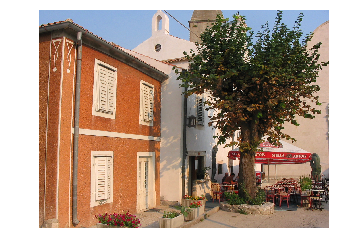

In [2]:
l = misc.imread("a2.jpg")
plt.imshow(l)
plt.axis('off')
plt.show()

c:\python27\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


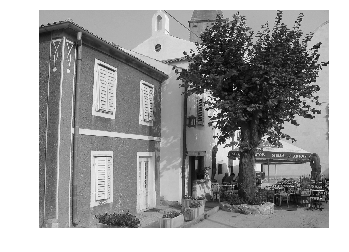

In [3]:
l = misc.imread("a2.jpg")
g = 0.2989 * l[:,:,0] + 0.5870 * l[:,:,1] + 0.1140 * l[:,:,2]
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.show()

# Rango dinámico de una imagen

Para una imagen en escala de grises, definimos el **rango dinámico** de una imagen como la dupla que indica el mínimo y el máximo valor de intensidad en la imagen:

$$[I_{min},\;I_{max}] = [\min (I), \;\max (I)]$$

## Función que identifica el rango dinámico de una imagen

In [4]:
def rango_din(Im):
    I_min = np.min(Im)
    I_max = np.max(Im)

    print (I_min, I_max)

In [5]:
rango_din(g)

(0.0, 252.6066)


Observa que si se utiliza un byte para registrar el valor de intensidad de un pixel, el máximo rango dinámico es: 

$$[0, \;255]$$

## Problemas de contraste

Una imagen presenta problemas de contraste cuando la distribución de sus intensidades no cubre el máximo rango dinámico posible. Cuando se presenta este problema, la imagen puede tener una calidad pobre.

### Transforma el rango de 100 a 200

Para ejemplificar, la siguiente celda cambia el rango dinámico de una imagen y lo restringe al intervalo $[100,\; 200]$

In [6]:
g_min = np.min(g)
g_max = np.max(g)

##########################################
gn = 100+100*(g-g_min)/float(g_max-g_min)
##########################################

rango_din(gn)

(100.0, 200.0)


In [7]:
gn = g

Visualizamos el histograma de frecuencias de ambas imágenes

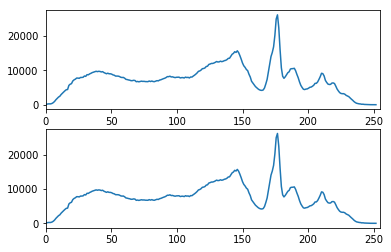

In [8]:
h = np.histogram(g, bins=256)
hn = np.histogram(gn, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

In [9]:
# modificamos la intensidad de un par de pixeles (datos atípicos)
gn[0,0] = 0
gn[0,1] = 255

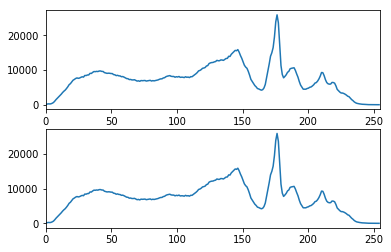

In [10]:
h = np.histogram(g, bins=256)
hn = np.histogram(gn, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

Comparamos las imágenes

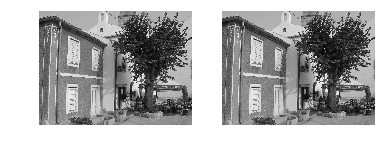

In [11]:
plt.subplot(121)
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(gn, cmap="gray")
plt.axis('off')
plt.show()

Otro ejemplo.

In [12]:
gn = 100*(g-g_min)/float(g_max-g_min)
rango_din(gn)
gn[0,0] = 0
gn[0,1] = 255

(0.0, 100.9474811822019)


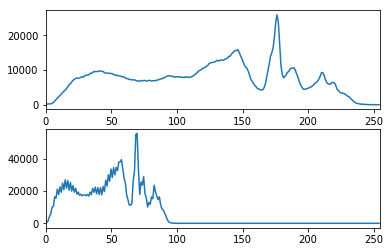

In [13]:
h = np.histogram(g, bins=256)
hn = np.histogram(gn, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

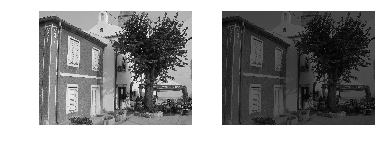

In [14]:
plt.subplot(121)
plt.imshow(g, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(gn, cmap="gray")
plt.axis('off')
plt.show()

## Transformación del rango

Si una imagen no hace uso completo de su rango dinámico, se puede aplicar una transformación lineal para reescalarlo. Un ejemplo es la siguiente:

$$I'[r,c] = 255\frac{I[r,c]-I_{min}}{I_{max}-I_{min}}$$

In [15]:
gn = 100*(g-g_min)/float(g_max-g_min)
rango_din(gn)

(0.0, 100.9474811822019)


In [16]:
g_min = np.min(gn)
g_max = np.max(gn)

######################################
g_t = 255*(gn-g_min)/(g_max-g_min)
######################################

In [17]:
rango_din(g_t)

(0.0, 255.00000000000003)


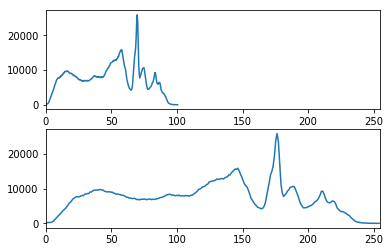

In [18]:
h = np.histogram(gn, bins=256)
hn = np.histogram(g_t, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

In [19]:
rango_din(gn)
gn[0,0] = 255
rango_din(gn)

(0.0, 100.9474811822019)
(0.0, 255.0)


In [20]:
g_min = np.min(gn)
g_max = np.max(gn)

######################################
g_t = 255*(gn-g_min)/(g_max-g_min)
######################################

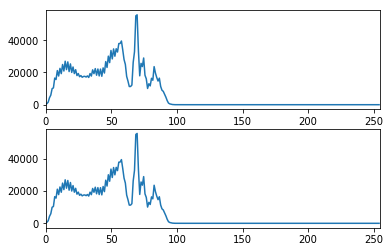

In [21]:
h = np.histogram(gn, bins=256)
hn = np.histogram(g_t, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

El mejoramiento del contraste puede hacerse más robusto si se consideran percentiles de la intensidad en lugar del mínimo o el máximo.

In [22]:
x = np.random.rand(1000)
print "Mínimo = " + str(np.min(x))
print "Máximo = " + str(np.max(x))
print "Percentil 1 = " + str(np.percentile(x,1))
print "Percentil 99 = " + str(np.percentile(x,99))

Mínimo = 0.00026414318311818175
Máximo = 0.9964585752861409
Percentil 1 = 0.013863020778900283
Percentil 99 = 0.9904511709155088


# Tarea 1

Si visualizamos la imagen, ademas del histograma, podemos darnos cuenta que efectivamente la transformacion del rango no funciono

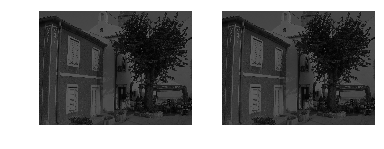

In [23]:
plt.subplot(121)
plt.imshow(gn, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(g_t, cmap="gray")
plt.axis('off')
plt.show()

En lugar de usar g_min y g_max usamos los percentiles para hacer más robusto, con el resto de la formula linear todo sigue igual.

In [24]:
# g_min = np.min(gn)
# g_max = np.max(gn)

g_min = np.percentile(gn,1)
g_max = np.percentile(gn,99)

######################################
g_t = 255*(gn-g_min)/(g_max-g_min)
######################################

Si visualizamos el histograma de las dos imágenes todo parece correcto, pues el rango dinámico se expandió.

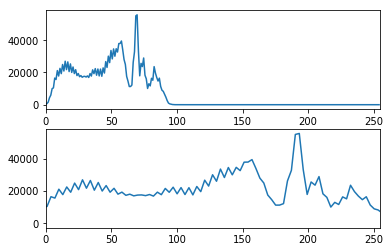

In [25]:
h = np.histogram(gn, bins=256)
hn = np.histogram(g_t, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

Pero al usar los percentiles el rango dinámico se sobre sale del rango que mencionamos antes si se utiliza un byte para registrar el valor de intensidad de un pixel, el máximo rango dinámico es:
$$[0, \;255]$$

In [26]:
rango_din(g_t)

(-16.903865994211262, 751.620508805496)


Basta con establecer en 0 los elementos que sean menores a 0, y a 255 los elementos que sean mayores a 255

In [27]:
ind_neg = g_t < 0
g_t[ind_neg] = 0
ind_may = g_t > 255
g_t[ind_may] = 255

In [28]:
# (ren, col) = g_t.shape

# for r in range(ren):
#     for c in range(col):
#         g_t[r][c] = 255 if g_t[r][c] > 255 else g_t[r][c]
#         g_t[r][c] = 0 if g_t[r][c] < 0 else g_t[r][c]

# rango_din(g_t)


Si ahora visualizamos el histograma con los cambios se verá exactamente igual. Esto es porque matplotlib ya hace la conversión.

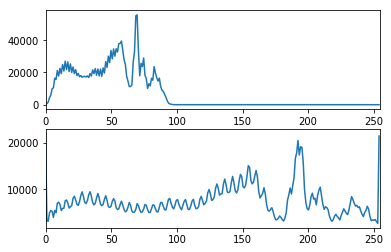

In [29]:
h = np.histogram(gn, bins=256)
hn = np.histogram(g_t, bins=256)

plt.subplot(211)
plt.plot(h[1][0:-1], h[0])
plt.xlim(0,255)

plt.subplot(212)
plt.plot(hn[1][0:-1], hn[0])
plt.xlim(0,255)

plt.show()

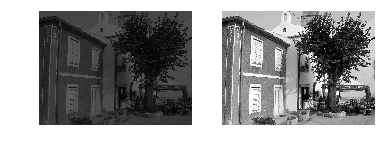

In [30]:
plt.subplot(121)
plt.imshow(gn, cmap="gray")
plt.axis('off')
plt.subplot(122)
plt.imshow(g_t, cmap="gray")
plt.axis('off')
plt.show()

In [31]:
rango_din(g_t)

(0.0, 255.0)
